# The FeatureSpace Intern Recruitment Challenge: Compromise point detection

In [82]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib
from matplotlib import pyplot as plt

## Read raw data from csv file
### simple analysis of data:
1. for each day, total number of transactions with a merchant would be less than 40
2. there are totally 1000 distinct accounts' transaction history recorded

In [240]:
# read raw data
raw_data = pd.read_csv("input.csv").iloc[:,[1, 2, 3]]
raw_data

,date,fraud,merchant
0,2015-01-01,False,M98
1,2015-01-01,False,M50
2,2015-01-01,False,M55
3,2015-01-01,False,M14
4,2015-01-01,False,M10
5,2015-01-01,False,M33
6,2015-01-01,False,M82
7,2015-01-01,False,M42
8,2015-01-01,False,M98
9,2015-01-01,False,M22


## Count fraud rate of each merchant on each day

In [238]:
def get_fraud_rate(x):
    fraud_rate = (x==True).sum() / float(len(x))
    return fraud_rate
    if fraud_rate > 0.05:
        return fraud_rate
    else:
        return 0

In [239]:
# count fraud info for each merchant on each day
fraud_col = raw_data.groupby(by=['date', 'merchant'])['fraud']
fraud_rate = fraud_col.apply(get_fraud_rate)
fraud_number = fraud_col.apply(lambda x: (x==True).sum())
transaction_number = fraud_col.apply(lambda x: len(x))

# convert the Hierachy index back to normal index
fraud_info = df(columns=['date', 'merchant', 'transaction_number', 'fraud_number', 'fraud_rate'])
for row in fraud_rate.items():
    i = len(fraud_info)
    fraud_info.loc[i] = [row[0][0], row[0][1], \
                        transaction_number[i], fraud_number[i], fraud_rate[i]]
fraud_info

,date,merchant,transaction_number,fraud_number,fraud_rate
0,2015-01-01,M0,25,0,0.000000
1,2015-01-01,M1,36,0,0.000000
2,2015-01-01,M10,32,1,0.031250
3,2015-01-01,M11,32,1,0.031250
4,2015-01-01,M12,31,0,0.000000
5,2015-01-01,M13,32,0,0.000000
6,2015-01-01,M14,33,0,0.000000
7,2015-01-01,M15,31,0,0.000000
8,2015-01-01,M16,31,0,0.000000
9,2015-01-01,M17,28,0,0.000000


## Get names of merchants

In [212]:
merchant_set = set()
for merchant in raw_data['merchant']:
    if merchant not in merchant_set:
        merchant_set.add(merchant)

## Plot out fraud rate against date for each merchant

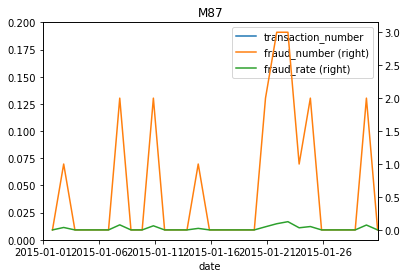

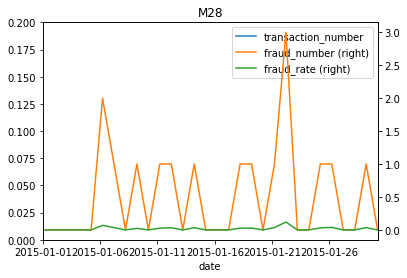

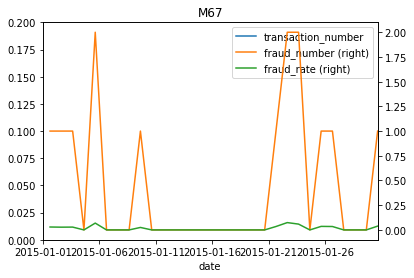

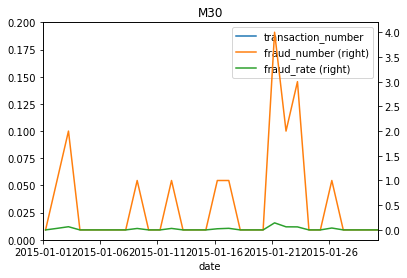

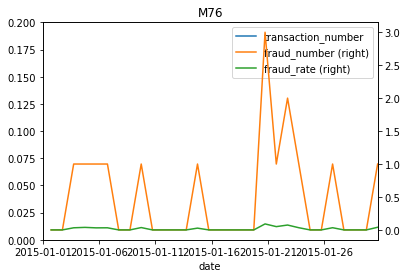

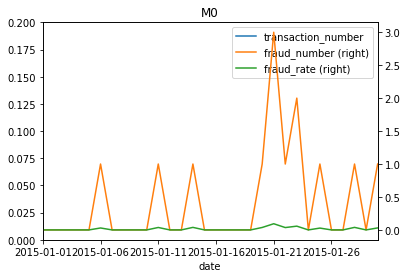

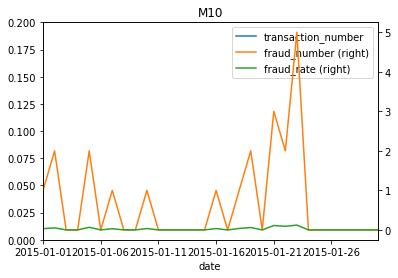

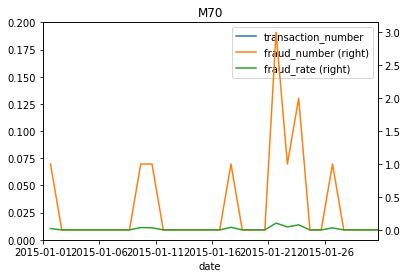

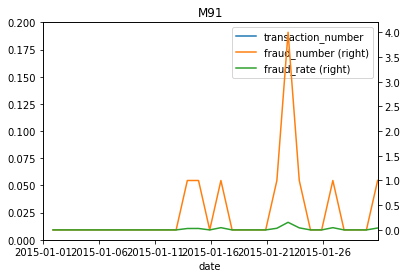

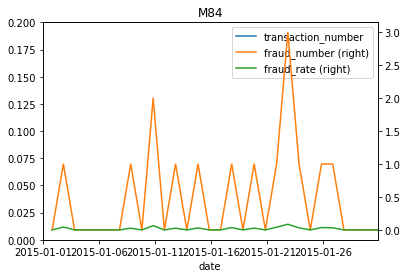

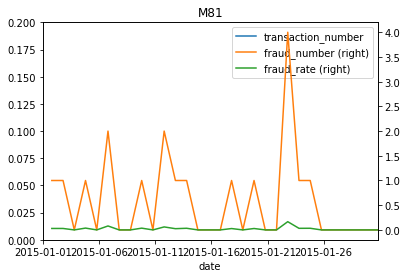

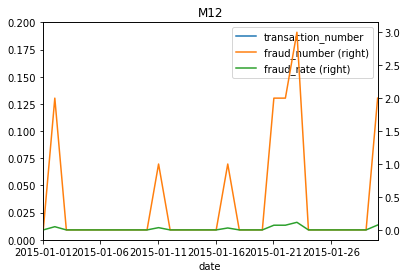

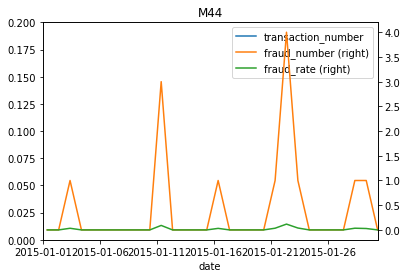

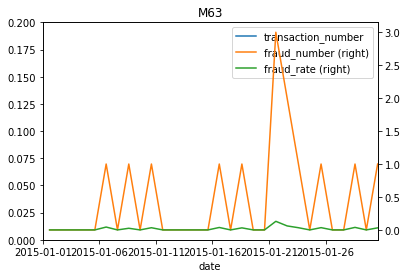

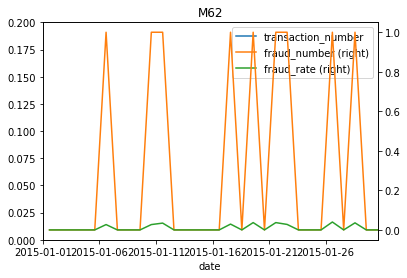

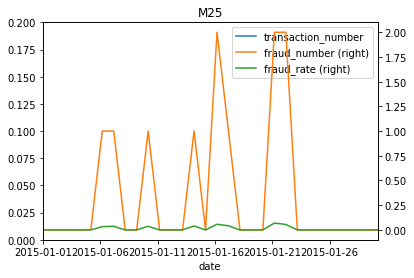

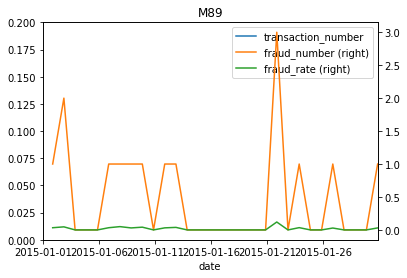

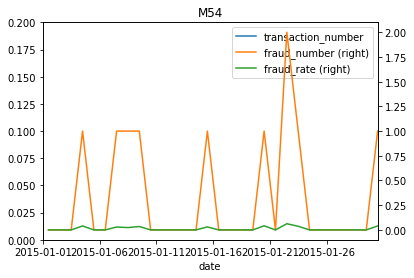

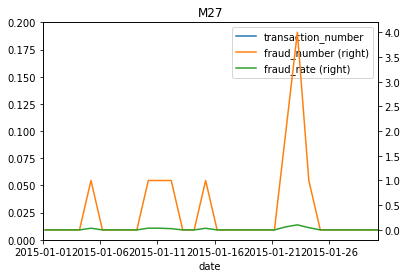

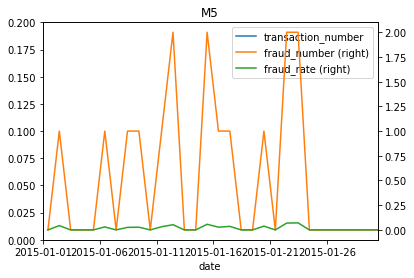

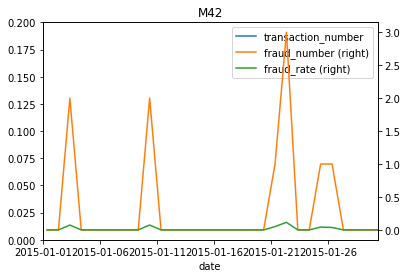

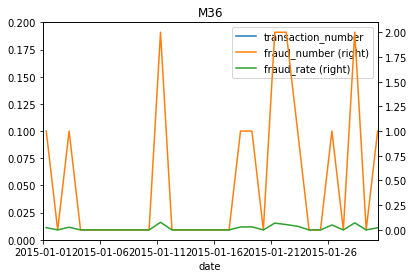

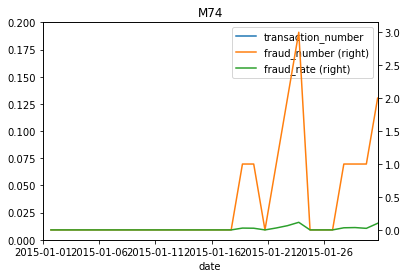

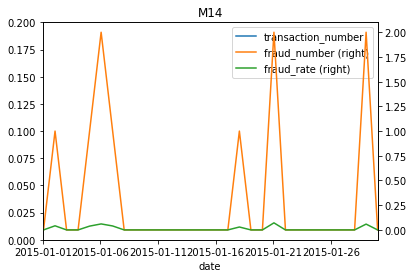

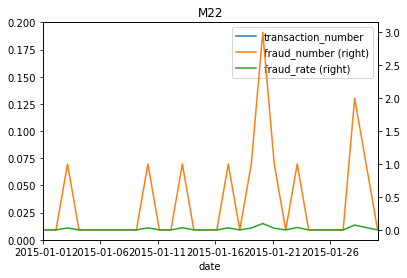

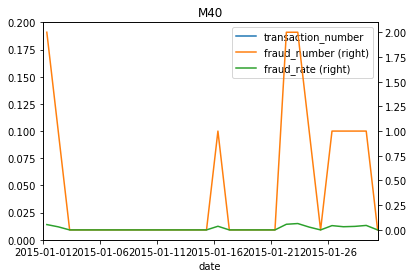

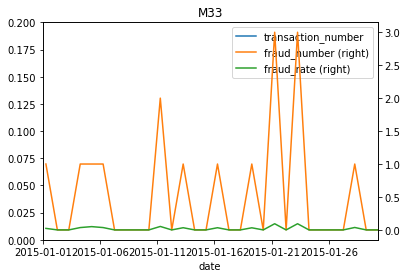

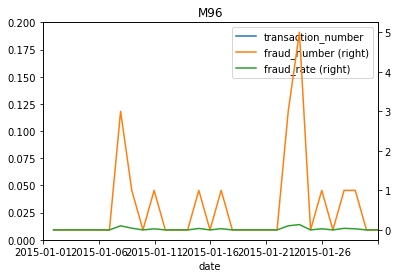

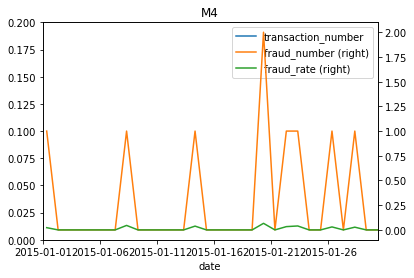

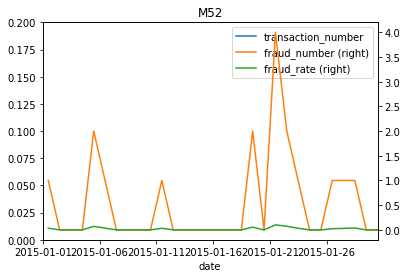

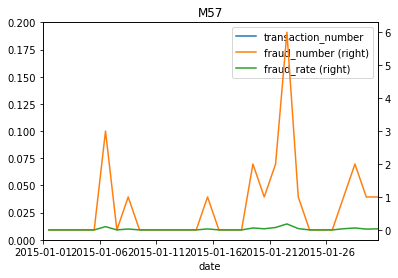

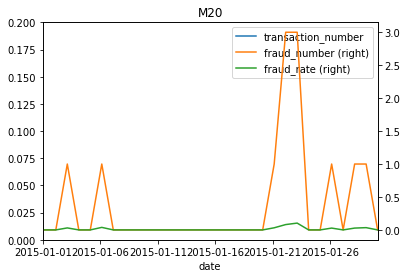

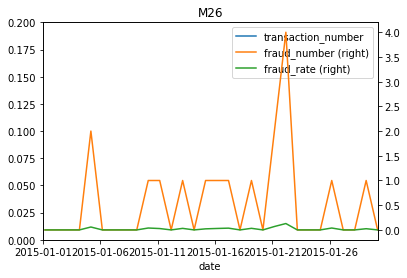

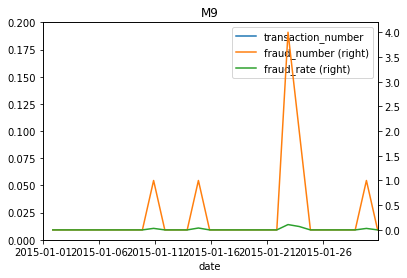

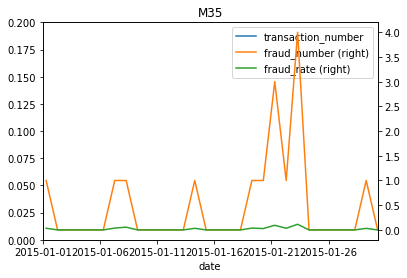

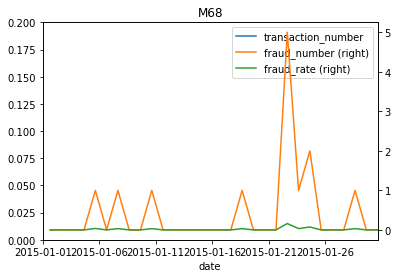

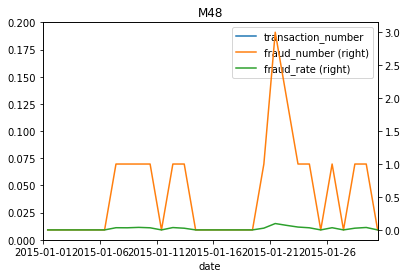

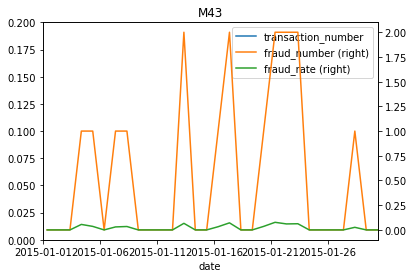

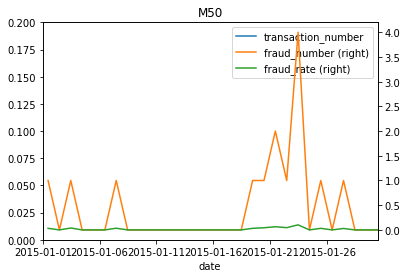

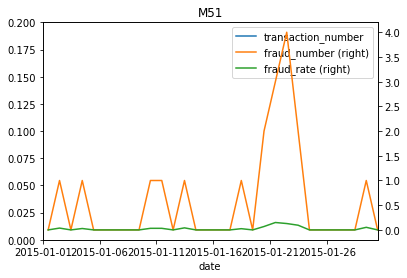

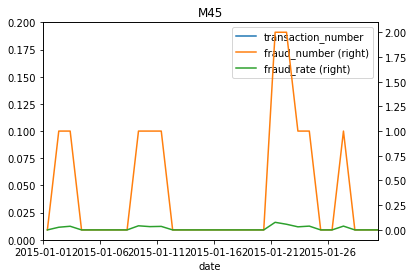

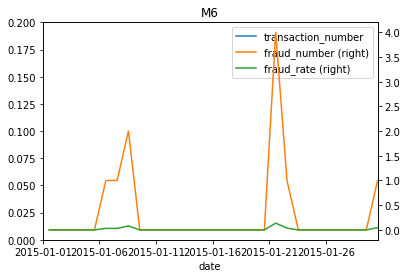

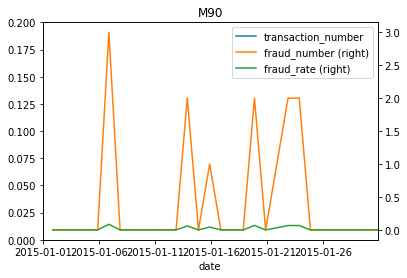

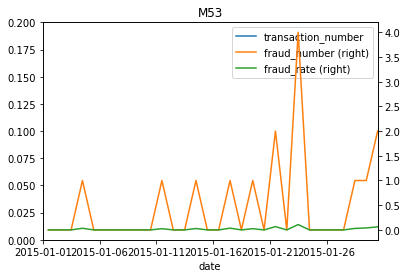

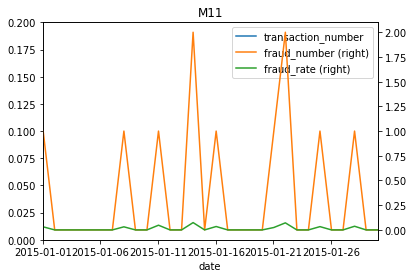

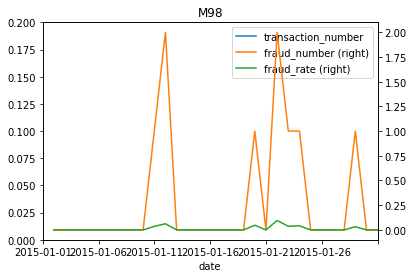

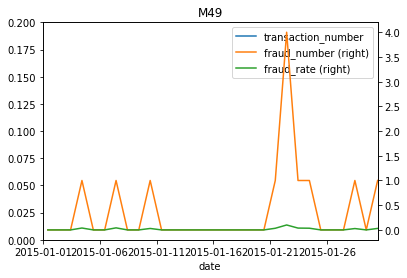

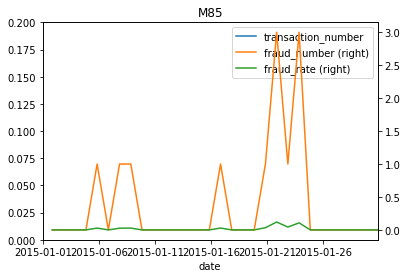

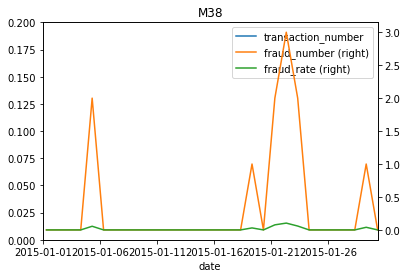

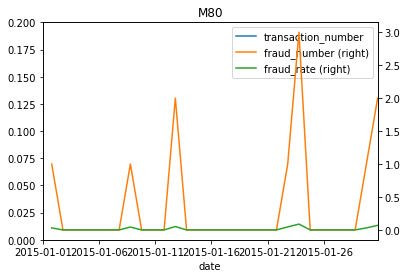

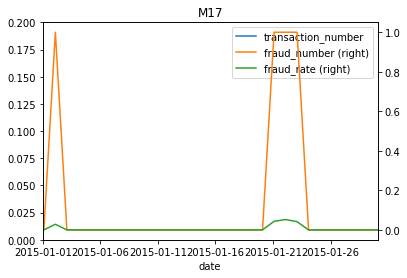

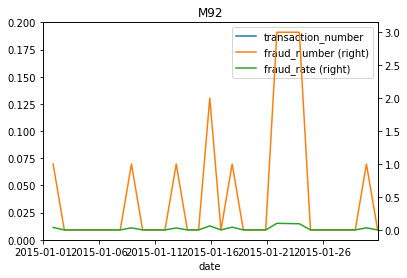

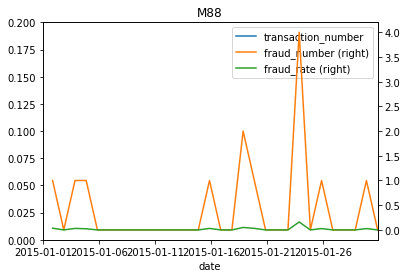

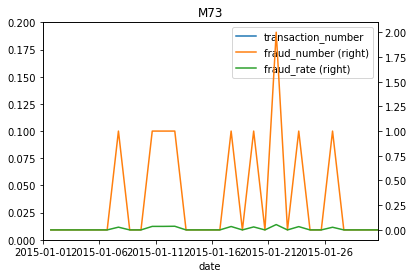

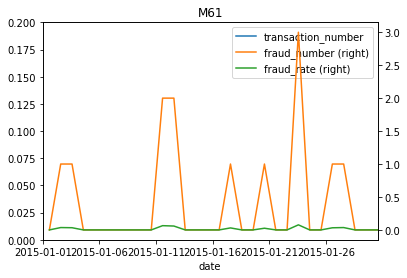

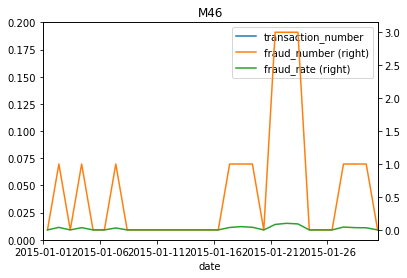

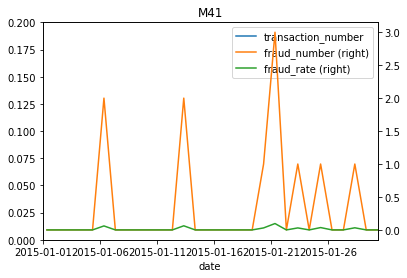

In [ ]:
for merchant in merchant_set:
    temp_df = fraud_info[fraud_info.merchant==merchant]
    #temp_df.cumsum().plot(x='date', y='fraud_rate', title=merchant, ylim=(0, 1))
    ax = temp_df.plot(x='date', y='transaction_number', title=merchant, ylim=(0, 45))
    temp_df.plot(y='fraud_number', ylim=(0, 10), ax=ax, secondary_y=True)
    temp_df.plot(y='fraud_rate', ylim=(0, 0.2), ax=ax, secondary_y=True)
    plt.show()